<a href="https://colab.research.google.com/github/YangchenHuang/Algorithmic_Trading/blob/master/Yangchen_Huang_HW1_(IEOR_E4650_Spring_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IEOR 4650  Business Analytics (Spring 2020)**

**Homework 1 [Total points: 60]**

**Due: 11:59 PM, Feb 15**

Homework 1 consists of Python programming practices and the applications to data cleaning and linear regression. 

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [0]:
#This imports all the packages you need for the homework
#Please run this first


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#import modules

import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt



## Exercise 1 [Total: 24 Points]

In this exercise, we will work a Star Wars dataset that practices our data cleaning skills.

<div>
<img src="https://upload.wikimedia.org/wikipedia/en/0/00/The_Child_aka_Baby_Yoda_%28Star_Wars%29.jpg" width="250"/>
</div>

## Setting
Star Wars is an American epic space-opera media franchise created by George Lucas, which began with the eponymous 1977 film and quickly became a worldwide pop-culture phenomenon. In Star Wars, there are many characters. Different characters live on different planets. In this exercise, we study two different tables. 

**Table 1: Characters**

In this table, each row represents a character. The columns give the name and the features of the character.




|Variable| Description|
|---|---|
|name |Name of the character|
|height |Height (cm)|
|mass |Weight (kg)|
|hair_color | Hair color|
|skin_color | Skin color|
|eye_color | Eye color|
|birth_year| Year born (BBY = Before Battle of Yavin)|
|gender|Gender|
|homeworld|Name of homeworld|
|species|Name of species|

**Table 2: Planets**


|Variable| Description|
|---|---|
|name| name of the planet|
|rotation_period| rotation period of the planet| 
|orbital_period| orbital period of the planet|
|diameter| diameter of the planet|
|climate| climate of the planet|
|gravity| gravity of the planet| 
|terrain| type of terrain on the planet|
|surface_water| surface water percentage|
|population| population on the planet|

**For these questions, you might need to certain methods that are not covered in the lecture**

**A good reference is Pandas cheatsheet [here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)**

In [100]:
#Load the dataset Planet
link="https://drive.google.com/open?id=1UNSrNrwJ962yWuZAIfrpP_JLp-HHI-1z"
_,id=link.split("=")
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('myfile.csv')  
Planet = pd.read_csv('myfile.csv')
Planet.head(5)





,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09
1,Yavin IV,24.0,4818.0,10200.0,"temperate, tropical",1 standard,"jungle, rainforests",8.0,1.000000e+03
2,Hoth,23.0,549.0,7200.0,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100.0,NaN
3,Dagobah,23.0,341.0,8900.0,murky,NaN,"swamp, jungles",8.0,NaN
4,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06


In [101]:
#Load the dataset Character

link="https://drive.google.com/open?id=1NUzWu-IyhGHKp1kvkjHldRgcmXxq0o1o"
_,id=link.split("=")
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('myfile.csv')  
Characters = pd.read_csv('myfile.csv')
Characters.head(5)


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human


### Q1. [4 points]

* Replace all the NA values in **Characters** table with np.nan. 
* Change the format of the columns for "height" and "mass" to float values.
* Report how many characters have missing height value or mass value.

**Make sure to print out the output for each sub-question**

In [102]:
# Replace all the NA values in Characters table with np.nan
Characters=Characters.replace("NaN", np.nan)
Characters.dtypes
Characters.isna().sum()

name           0
height         6
mass          28
hair_color     6
skin_color     2
eye_color      3
birth_year    44
gender         3
homeworld     10
species        5
dtype: int64

In [103]:
Characters.dtypes
# height already formated as float, only need to format mass

name           object
height        float64
mass           object
hair_color     object
skin_color     object
eye_color      object
birth_year     object
gender         object
homeworld      object
species        object
dtype: object

In [104]:
# Change the format of the columns for "height" and "mass" to float values.

Characters["mass"]=Characters["mass"].astype(str)
Characters["mass"].dtypes
def convert(value):
  new_value=value.replace(",","")
  return np.float(new_value)
Characters["mass"]=Characters["mass"].apply(convert)
Characters.dtypes

name           object
height        float64
mass          float64
hair_color     object
skin_color     object
eye_color      object
birth_year     object
gender         object
homeworld      object
species        object
dtype: object

In [105]:
# Report how many characters have missing height value or mass value.
Characters[["height","mass"]].isna().sum()

height     6
mass      28
dtype: int64

###Q2 [10 points]

BMI (Body Mass Index) is a person's weight in kilograms divided by the square of height in meters.

In addition, we have a conversion rule defined as follows:

| BMI range|BMI Categories|
|---|---|
| Human and (0,18.5)|Underweight|
| Human and [18.5–25)|Normal|
| Human and [25–30)|Overweight|
| Human and [30, $\infty$)|Obesity|
|Not Human and any BMI| NotHuman|

* Assign a new column "BMI"  that gives the BMI of each character to the **Characters** table.
* Assign a new column "BMI_category" to **Characters** table, This new column converts the BMI of each character to the BMI category based on the table listed above.
* Report how many characters fall into each of the five BMI categories. [hint: search groupby method]
* Report the human with the highest BMI and lowest BMI. **Make sure that your code takes care of ties. In other words, you should not eyeball the results. Also, when tie happens, the code should automatically report all of them** 


**Make sure to print out the output for each sub-question**

In [106]:
# Assign a new column "BMI" that gives the BMI of each character to the Characters table.
Characters=Characters.assign(BMI=Characters["mass"] / (Characters["height"]/100)**2)
Characters

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,BMI
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human,26.027582
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid,26.892323
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid,34.722222
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human,33.330066
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human,21.777778
...,...,...,...,...,...,...,...,...,...,...,...
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,NaN,Human,NaN
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,NaN,Human,NaN
84,BB8,NaN,NaN,none,none,black,NaN,none,NaN,Droid,NaN
85,Captain Phasma,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN,NaN


In [107]:
# Assign a new column "BMI_category" to Characters table, This new column converts the BMI of each character to the BMI category based on the table listed above.
def BMI_cat(row):
    if row['species']=='Human':
      if 0<row['BMI']<18.5: return 'Underweight'
      elif 18.5<=row['BMI']<25: return 'Normal'
      elif 25<=row['BMI']<30: return 'Overweight'
      elif row['BMI']>=30: return 'Obesity'
    else:
      return 'NotHuman'
Characters=Characters.assign(BMI_category=Characters.apply(BMI_cat, axis=1))
Characters

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,BMI,BMI_category
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human,26.027582,Overweight
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid,26.892323,NotHuman
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid,34.722222,NotHuman
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human,33.330066,Obesity
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human,21.777778,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,NaN,Human,NaN,None
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,NaN,Human,NaN,None
84,BB8,NaN,NaN,none,none,black,NaN,none,NaN,Droid,NaN,NotHuman
85,Captain Phasma,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN,NaN,NotHuman


In [108]:
# Report how many characters fall into each of the five BMI categories
Characters[["BMI","BMI_category"]].groupby("BMI_category").count()

,BMI
BMI_category,
Normal,11
NotHuman,37
Obesity,3
Overweight,7
Underweight,1


In [109]:
# Report the human with the highest BMI and lowest BMI.
h=Characters[Characters["species"]=="Human"]
h[h["BMI"]==h["BMI"].max()]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,BMI,BMI_category
5,Owen Lars,178.0,120.0,"brown, grey",light,blue,52BBY,male,Tatooine,Human,37.874006,Obesity


In [110]:
h[h["BMI"]==h["BMI"].min()]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,BMI,BMI_category
86,Padmé Amidala,165.0,45.0,brown,light,brown,46BBY,female,Naboo,Human,16.528926,Underweight


### Q3 [10 points]

* Left merge **planet** table to **character** table so that each character in the **character** table will include associated planet features.

* Among characters living with surface water percentage higher than 50% (no need to consider missing values), what is the average BMI?  

* Create a sub-table that includes character names, characters height, character mass, character BMI for those living on a planet with only temperate climate.  

* Sort the sub-table based on height values from the smallest to the largest. [hint: search for sort methods]



**Make sure to print out the output for each sub-question**

In [111]:
# Left merge planet table to character table so that each character in the character table will include associated planet features.
merged=pd.merge(Characters, Planet, how='left', left_on="homeworld", right_on="name").drop(columns=['name_y'])
merged

,name_x,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,BMI,BMI_category,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human,26.027582,Overweight,23.0,304.0,10465.0,arid,1 standard,desert,1.0,2.000000e+05
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid,26.892323,NotHuman,23.0,304.0,10465.0,arid,1 standard,desert,1.0,2.000000e+05
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid,34.722222,NotHuman,26.0,312.0,12120.0,temperate,1 standard,"grassy hills, swamps, forests, mountains",12.0,4.500000e+09
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human,33.330066,Obesity,23.0,304.0,10465.0,arid,1 standard,desert,1.0,2.000000e+05
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human,21.777778,Normal,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,NaN,Human,NaN,None,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,NaN,Human,NaN,None,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
84,BB8,NaN,NaN,none,none,black,NaN,none,NaN,Droid,NaN,NotHuman,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
85,Captain Phasma,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN,NaN,NotHuman,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [112]:
# Among characters living with surface water percentage higher than 50% (no need to consider missing values), what is the average BMI?
np.average(merged[(merged["surface_water"]>50) & (merged["BMI"].notna())]["BMI"])

24.61880669637577

In [113]:
# Create a sub-table that includes character names, characters height, character mass, character BMI for those living on a planet with only temperate climate.
temp=merged[["name_x","height", "mass", "BMI"]][merged["climate"]=="temperate"]
temp

,name_x,height,mass,BMI
2,R2-D2,96.0,32.0,34.722222
4,Leia Organa,150.0,49.0,21.777778
9,Obi-Wan Kenobi,182.0,77.0,23.245985
13,Han Solo,180.0,80.0,24.691358
15,Jabba Desilijic Tiure,175.0,1358.0,443.428571
16,Wedge Antilles,170.0,77.0,26.643599
17,Jek Tono Porkins,180.0,110.0,33.950617
19,Palpatine,170.0,75.0,25.951557
20,Boba Fett,183.0,78.2,23.350951
24,Lobot,175.0,79.0,25.795918


In [114]:
# Sort the sub-table based on height values from the smallest to the largest. [hint: search for sort methods]
temp.sort_values(by=["height"])

,name_x,height,mass,BMI
28,Wicket Systri Warrick,88.0,20.0,25.826446
2,R2-D2,96.0,32.0,34.722222
37,Watto,137.0,NaN,NaN
4,Leia Organa,150.0,49.0,21.777778
26,Mon Mothma,150.0,NaN,NaN
57,Cordé,157.0,NaN,NaN
86,Padmé Amidala,165.0,45.0,16.528926
62,Dormé,165.0,NaN,NaN
70,Jocasta Nu,167.0,NaN,NaN
16,Wedge Antilles,170.0,77.0,26.643599


## Exercise 2 [Total: 36 Points]



###Setting
In this exercise, we will work with a dataset which explores the store sales.

Before doing the assignment, please study this dataset here https://www.kaggle.com/c/rossmann-store-sales/data


In [144]:
#Load the dataset
link="https://drive.google.com/open?id=1Q6J0q4tlWJ7TajX6hMSvZ8tK3CyDD8QY"
_,id=link.split("=")
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Sales.csv')  
Sales = pd.read_csv('Sales.csv')
Sales.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


*You might see a warning when importing the data. This is because StateHoliday has both values in string and numbers. No worries about this for now.*

###Q1 [6 points]


* Use a scatter plot to discuss whether there is any relationship between sales and customers. 


* Report the store with the highest average sales per day.

* Report the store with the highest average customers per day.

* Report the store with the highest average sales/customers ratio per day.







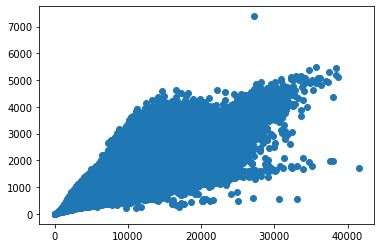

In [138]:
# Use a scatter plot to discuss whether there is any relationship between sales and customers.
import matplotlib.pyplot as plt
plt.scatter(Sales["Sales"], Sales["Customers"])

Sales and Customers may have a positive relationship

In [139]:
# Report the store with the highest average sales per day.
Sales[["Store", "Sales"]].groupby("Store").agg(np.average)

,Sales
Store,
1,3945.704883
2,4122.991507
3,5741.253715
4,8021.769639
5,3867.110403
...,...
1111,4342.968153
1112,8465.280255
1113,5516.180467


In [140]:
# Report the store with the highest average customers per day.
Sales[["Store", "Customers"]].groupby("Store").agg(np.average)

,Customers
Store,
1,467.646497
2,486.045648
3,620.286624
4,1100.057325
5,444.360934
...,...
1111,373.548832
1112,693.498938
1113,596.763270


In [146]:
S=Sales.assign(ratio=Sales["Sales"]/Sales["Customers"]).fillna(0)
S[["Store", "ratio"]].groupby("Store").agg(np.average)

,ratio
Store,
1,6.958559
2,6.998110
3,7.539925
4,6.033827
5,7.121176
...,...
1111,9.549273
1112,9.918483
1113,7.666212


### Q2 [12 points]

Run the following model

$$Sales=\beta_0+\beta_1 Customers+ \beta_2 Open + \epsilon$$

> (1) Print out the summary output

> (2) Based on the regression result, answer the following questions

>> In the context of this question, interpret $\hat{\beta_0}$, $\hat{\beta_1}$ and $\hat{\beta_2}$ based on the regression output. 

>> Based on the p-value corresponding to the row of customers, what can you conclude?

>> Report the 99% confidence interval for $\beta_1$

>> Compute $R^2$ and adjusted $R^2$ based on NumPy array operations. Your results should match the values reported from `model.rsquared` and `model.rsquared_adj`.

###Q3 [5 points]

Run the running model with **only observations that have the store opening during the observation day.**

$$Sales=\beta_0+\beta_1 Customers + \epsilon$$

* Report the regression output table
* Are both models in Q2 and Q3 estimating the same thing? Why?

###Q4 [13 points]

* Plot residual v.s. fitted value plot for the model in Q3. Describe any issues you see. 

* Use histograms to explain why log transformation might help you solve the problem. Notice that if a variable $x$ takes value=0, you will encounter errors when taking $ln(x)$. We can use $ln(x+1)$ instead of $ln(x)$. If the values of $x$ are generally large, you can interpret the coefficient as if we used $ln(x)$.

* Apply adequate transformations for the model in Q1. Run a simple linear regression with transformed variables and report the output. 
  
* Provide residual v.s. fitted value plot value again. Compare with the previous plot to discuss whether the model looks better based on residual analysis.

* In the context of this question, interpret $\hat{\beta_1}$ based on the regression output.


